Assignment 1  - Penalty Predictions
Author - Ananth Vikram

In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import os
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.metrics import confusion_matrix 
import logging,sys
from sklearn import preprocessing, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
import graphviz as gv

In [2]:
penalty_data=pd.read_csv("ML1_penalty_data.csv",encoding="latin")

In [3]:
print("Dimensions:\n",penalty_data.shape)
print("---------------------------------------------------------------------")
print("Columns:\n",penalty_data.columns)
print("---------------------------------------------------------------------")
print("Top 3 rows:\n",penalty_data.head(3))
print("---------------------------------------------------------------------")
print("Info:\n")
print(penalty_data.info())
print("---------------------------------------------------------------------")
print("Unique value count:\n")
print(penalty_data.apply(lambda x: x.nunique()))
print("---------------------------------------------------------------------")
print("Missing value count:\n")
print(penalty_data.apply(lambda x: x.isna().sum()))
print("---------------------------------------------------------------------")
print("Unique values:\n")
print(penalty_data[['Scored', 'Foot', 'Kick_Direction','Keeper_Direction']].apply(lambda x: x.unique().tolist()))

Dimensions:
 (103, 12)
---------------------------------------------------------------------
Columns:
 Index(['No.', 'Match Week', 'Date', 'Player', 'Team', 'Versus', 'Match',
       'Time of Penalty Awarded', 'Scored', 'Foot', 'Kick_Direction',
       'Keeper_Direction'],
      dtype='object')
---------------------------------------------------------------------
Top 3 rows:
    No.  Match Week       Date         Player       Team      Versus  \
0    1           1  13-Aug-16   Riyad Mahrez  Leicester        Hull   
1    2           1  13-Aug-16  Sergio Agüero   Man City  Sunderland   
2    3           1  14-Aug-16   Theo Walcott    Arsenal   Liverpool   

                    Match Time of Penalty Awarded  Scored Foot Kick_Direction  \
0       Hull vs Leicester              47' minute  Scored    L              C   
1  Man City vs Sunderland               4' minute  Scored    R              L   
2    Arsenal vs Liverpool              30' minute  Missed    R              L   

  Keeper_Di

In [4]:
penalty_data['Keeper_Direction_Code']=penalty_data['Keeper_Direction'].apply(lambda x: 0 if x =='L' else (1 if x =='R' else 2))

In [5]:
penalty_data.groupby(['Kick_Direction']).size()

Kick_Direction
C    17
L    47
R    39
dtype: int64

In [6]:
penalty_data.groupby(['Keeper_Direction']).size()

Keeper_Direction
C     6
L    45
R    52
dtype: int64

In [7]:
penalty_filtered_data=penalty_data[penalty_data['Keeper_Direction']!='C'] #Removing non significant value

In [8]:
penalty_filtered_data.groupby(['Keeper_Direction']).size()

Keeper_Direction
L    45
R    52
dtype: int64

In [9]:
penalty_dummy_df=pd.get_dummies(penalty_filtered_data[['Scored', 'Foot', 'Kick_Direction','Keeper_Direction_Code']],drop_first=True)
#penalty_dummy_df=penalty_dummy_df.drop(["Scored_Missed","Foot_R"],axis=1)

In [10]:
penalty_dummy_df.head(5)

,Keeper_Direction_Code,Scored_Scored,Foot_R,Kick_Direction_L,Kick_Direction_R
0,1,1,0,0,0
1,0,1,1,1,0
2,0,0,1,1,0
3,0,1,1,0,0
4,1,1,1,1,0


In [11]:
penalty_dummy_df.columns

Index(['Keeper_Direction_Code', 'Scored_Scored', 'Foot_R', 'Kick_Direction_L',
       'Kick_Direction_R'],
      dtype='object')

In [12]:
#Split Data
training_features = [ 'Scored_Scored', 'Foot_R', 'Kick_Direction_L',
       'Kick_Direction_R']

target = 'Keeper_Direction_Code'

train_x, test_x, train_y, test_y = train_test_split(penalty_dummy_df[training_features], 
                                                    penalty_dummy_df[target], train_size=0.8,random_state=45) 


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


CM: 7 3 3 7
Sensitivity =  0.7
Specificity = 0.7
Accuracy= 0.7


Text(0.5,1,'LogReg - Confusion Matrix')

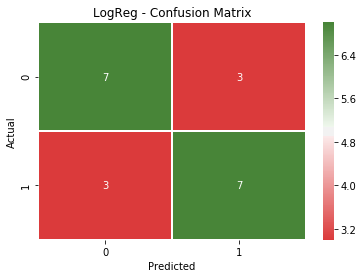

In [13]:
#Logistic Regression

LogReg_model=LogisticRegression(C=1,random_state=0,solver='liblinear')
LogReg_model.fit(train_x,train_y)
LogReg_predictions = LogReg_model.predict(test_x)
LogReg_cm = confusion_matrix(test_y,LogReg_predictions)
tn, fp, fn, tp = LogReg_cm.ravel()
print("CM:",tn, fp, fn, tp)
print("Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
ax= plt.subplot()
cmap = sns.diverging_palette(12, 123, as_cmap=True)

sns.heatmap(LogReg_cm, annot=True,cmap=cmap, linewidths=.5,ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('LogReg - Confusion Matrix')

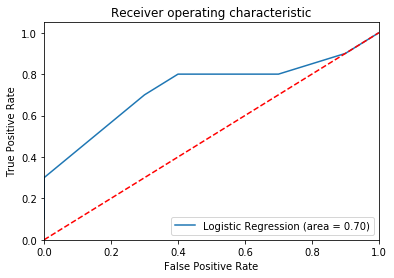

In [14]:
#ROC for Logistic Regression Model

logit_roc_auc = roc_auc_score(test_y,LogReg_predictions)
fpr, tpr, thresholds = roc_curve(test_y, LogReg_model.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
#Predict goal keeper movement

#training_features = [ 'Scored_Scored', 'Foot_R', 'Kick_Direction_L','Kick_Direction_R']
keeper_direction=['Left','Right']

print("#Scenario 1: If left foot is used kick towards left side and goal is saved, then the keeper moves to towards:"
      ,keeper_direction[LogReg_model.predict([[0,0,1,0]])[0]])

print("#Scenario 2: If left foot is used kick towards right side and goal is saved, then the keeper moves to towards:"
      ,keeper_direction[LogReg_model.predict([[0,0,0,1]])[0]])

print("#Scenario 3: If right foot is used kick towards left side and goal is saved, then the keeper moves to towards:"
      ,keeper_direction[LogReg_model.predict([[0,1,1,0]])[0]])

print("#Scenario 4: If right foot is used kick towards right side and goal is saved, then the keeper moves to towards:"
      ,keeper_direction[LogReg_model.predict([[0,1,0,0]])[0]])


#Scenario 1: If left foot is used kick towards left side and goal is saved, then the keeper moves to towards: Right
#Scenario 2: If left foot is used kick towards right side and goal is saved, then the keeper moves to towards: Right
#Scenario 3: If right foot is used kick towards left side and goal is saved, then the keeper moves to towards: Left
#Scenario 4: If right foot is used kick towards right side and goal is saved, then the keeper moves to towards: Left


#Trials for various other classification techniques

Sensitivity =  0.4
Specificity = 0.9
Accuracy= 0.65


Text(0.5,1,'SVM - Confusion Matrix')

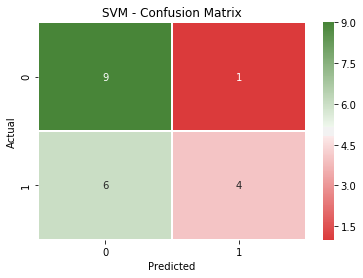

In [23]:
#SVM
svm_model=svm.SVC(kernel="linear",C=100,random_state=2,gamma=100)
svm_model.fit(train_x,train_y)
svm_predictions = svm_model.predict(test_x)
svm_cm = confusion_matrix(test_y,svm_predictions)
tn, fp, fn, tp = svm_cm.ravel()
print("Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
ax= plt.subplot()
cmap = sns.diverging_palette(12, 123, as_cmap=True)
sns.heatmap(svm_cm, annot=True,cmap=cmap, linewidths=.5, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('SVM - Confusion Matrix')

Sensitivity =  0.8
Specificity = 0.6
Accuracy= 0.7


Text(0.5,1,'DT - Confusion Matrix')

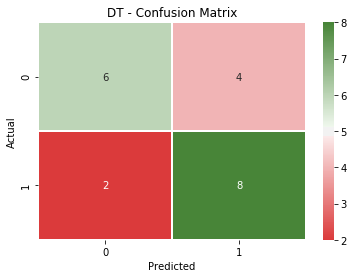

In [17]:
#Decision Trees
DT_model=DecisionTreeClassifier(
        criterion = "gini", random_state=0,max_depth=20,min_samples_leaf=4
                                    )
DT_model.fit(train_x,train_y)
DT_predictions = DT_model.predict(test_x)
DT_cm = confusion_matrix(test_y,DT_predictions)
tn, fp, fn, tp = DT_cm.ravel()
print("Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
ax= plt.subplot()
cmap = sns.diverging_palette(12, 123, as_cmap=True)
sns.heatmap(DT_cm, annot=True,cmap=cmap, linewidths=.5, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('DT - Confusion Matrix')

Sensitivity =  0.9
Specificity = 0.2
Accuracy= 0.55


Text(0.5,1,'KNN - Confusion Matrix')

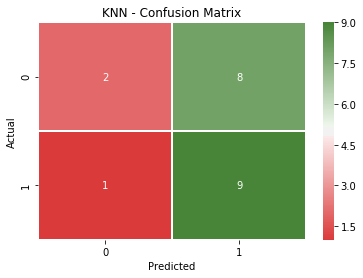

In [18]:
#KNN
KNN_model=neighbors.KNeighborsClassifier()
KNN_model.fit(train_x,train_y)
KNN_predictions = KNN_model.predict(test_x)
KNN_cm = confusion_matrix(test_y,KNN_predictions)
tn, fp, fn, tp = KNN_cm.ravel()
print("Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
ax= plt.subplot()
cmap = sns.diverging_palette(12, 123, as_cmap=True)
sns.heatmap(KNN_cm, annot=True,cmap=cmap, linewidths=.5, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('KNN - Confusion Matrix')

Sensitivity =  0.9
Specificity = 0.5
Accuracy= 0.7


Text(0.5,1,'RandomForest - Confusion Matrix')

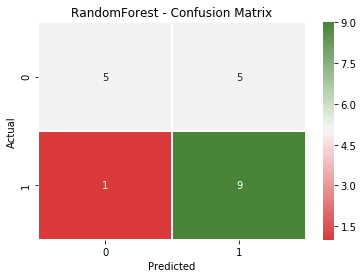

In [19]:
#RandomForest
RandomForest_model=RandomForestClassifier(n_estimators=105, max_depth=10,random_state=10,min_samples_leaf=5,criterion='entropy')
RandomForest_model.fit(train_x,train_y)
RandomForest_predictions = RandomForest_model.predict(test_x)
RandomForest_cm = confusion_matrix(test_y,RandomForest_predictions)
tn, fp, fn, tp = RandomForest_cm.ravel()
print("Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
ax= plt.subplot()
cmap = sns.diverging_palette(12, 123, as_cmap=True)
sns.heatmap(RandomForest_cm, annot=True,cmap=cmap, linewidths=.5, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('RandomForest - Confusion Matrix')

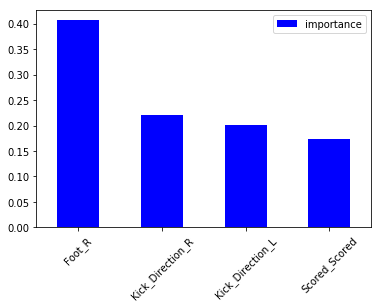

In [83]:
feature_importances = pd.DataFrame(RandomForest_model.feature_importances_,
                                   index = train_x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

ax = feature_importances.plot.bar(y='importance', rot=45,color='b')